In [ ]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from networkx.linalg.graphmatrix import adjacency_matrix
import time
import random
#file path
file_path = '/content/PathLinker_2018_human-ppi-weighted-cap0_75.txt'



In [ ]:
#load data
with open(file_path,"r") as file:
    data=pd.read_csv(file, sep="\t",header=0, comment='#' )
# rename coulmns
data.columns=["Tail", "Head", "Confidence", "Method"]


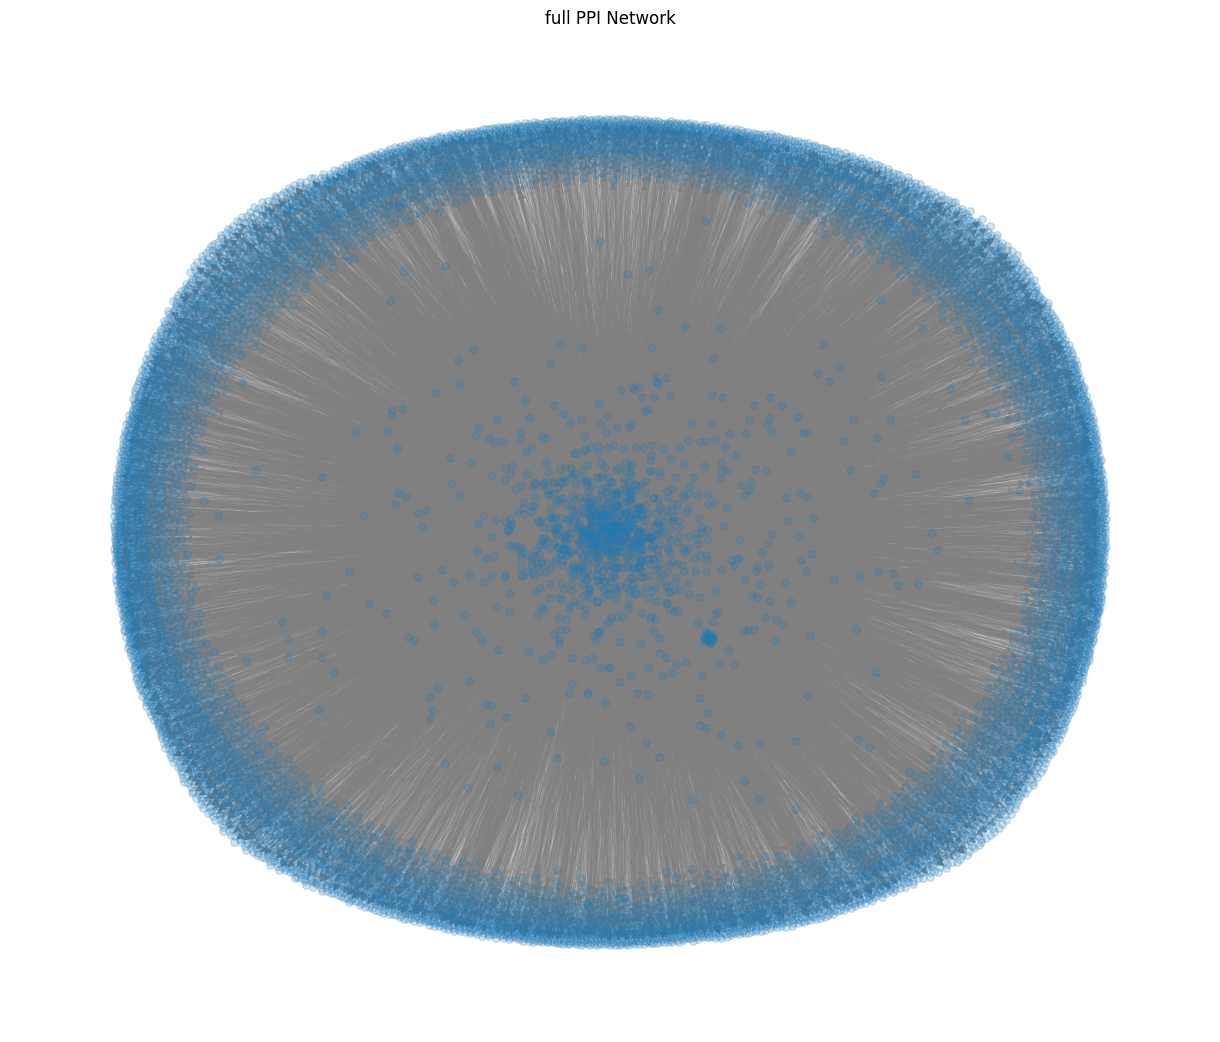

In [ ]:
  # layout verion
 #plot full ppi graph
graph1 = nx.from_pandas_edgelist(data , source="Tail", target="Head", edge_attr="Confidence", create_using=nx.DiGraph)
plt.figure(figsize=(12, 10))

# Use spring layout to improve node distribution
pos = nx.spring_layout(graph1, k=0.1)

# Draw the graph with better visibility
nx.draw(graph1, pos, with_labels=False, node_size=30, edge_color="gray", alpha=0.2, width=0.5)

plt.title("full PPI Network")
plt.show()
plt.close()

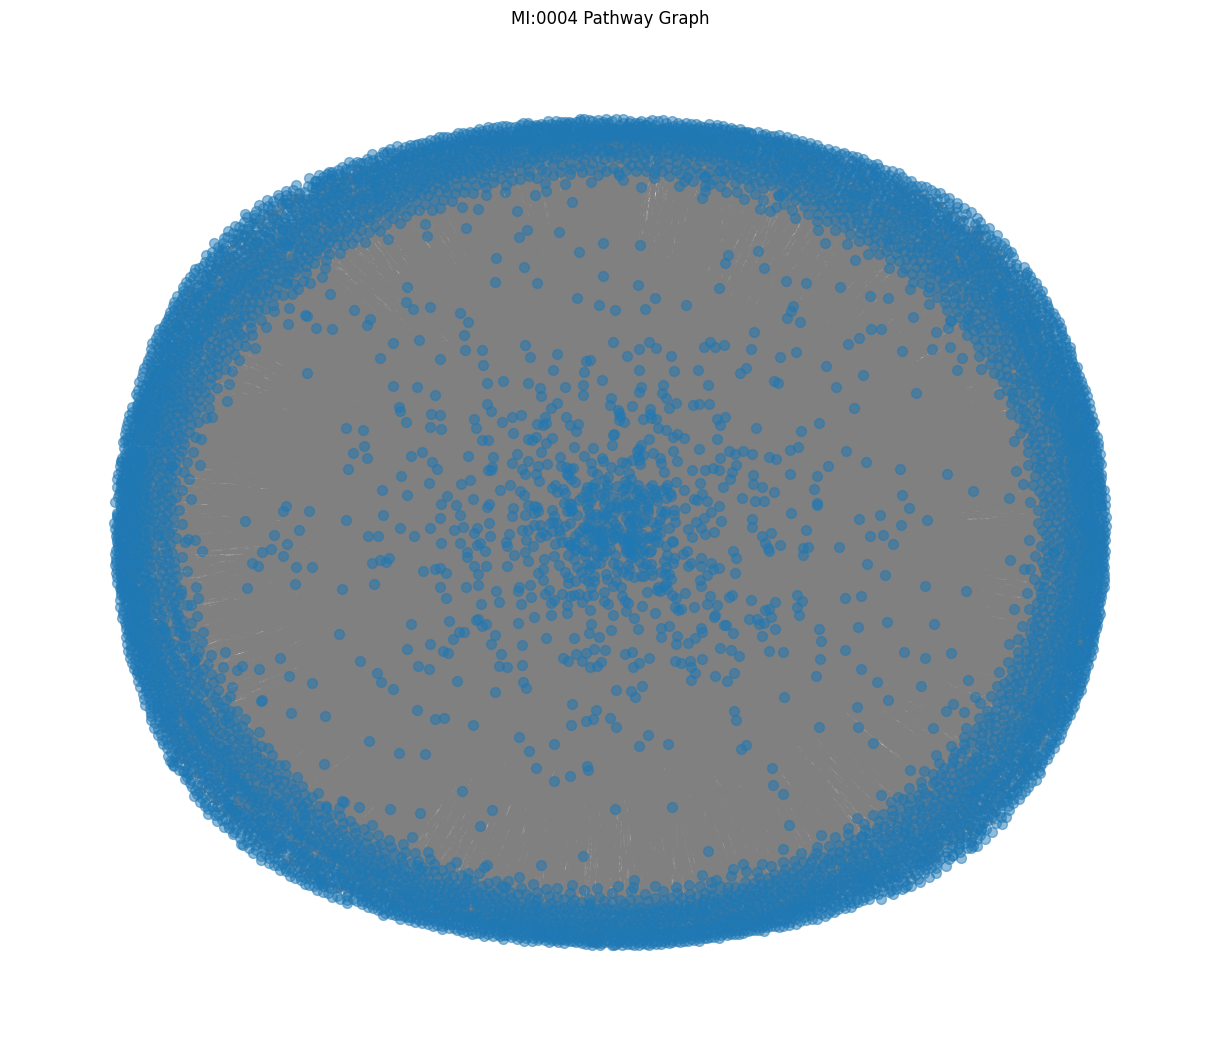

In [ ]:
 # layout verion

  # Filter data for a specific pathway method (MI:0004)
one_pathway_data = data[data["Method"].str.contains("MI:0004", na=False)]

# Create a directed graph for the pathway
one_pathway_graph = nx.from_pandas_edgelist(one_pathway_data, source="Tail", target="Head",
                                            edge_attr="Confidence", create_using=nx.DiGraph)

# Set figure size
plt.figure(figsize=(12, 10))

# Use a spring layout for better node distribution
pos = nx.spring_layout(one_pathway_graph, k=0.3)  # Adjust `k` for spacing

# Determine whether to show labels based on graph size
show_labels = one_pathway_graph.number_of_nodes() < 100

# Draw the graph with improved visibility
nx.draw(one_pathway_graph, pos, with_labels=show_labels, node_size=50,
        edge_color="gray", alpha=0.5, width=0.8, font_size=6)

# Set title
plt.title("MI:0004 Pathway Graph")
plt.show()
plt.close()



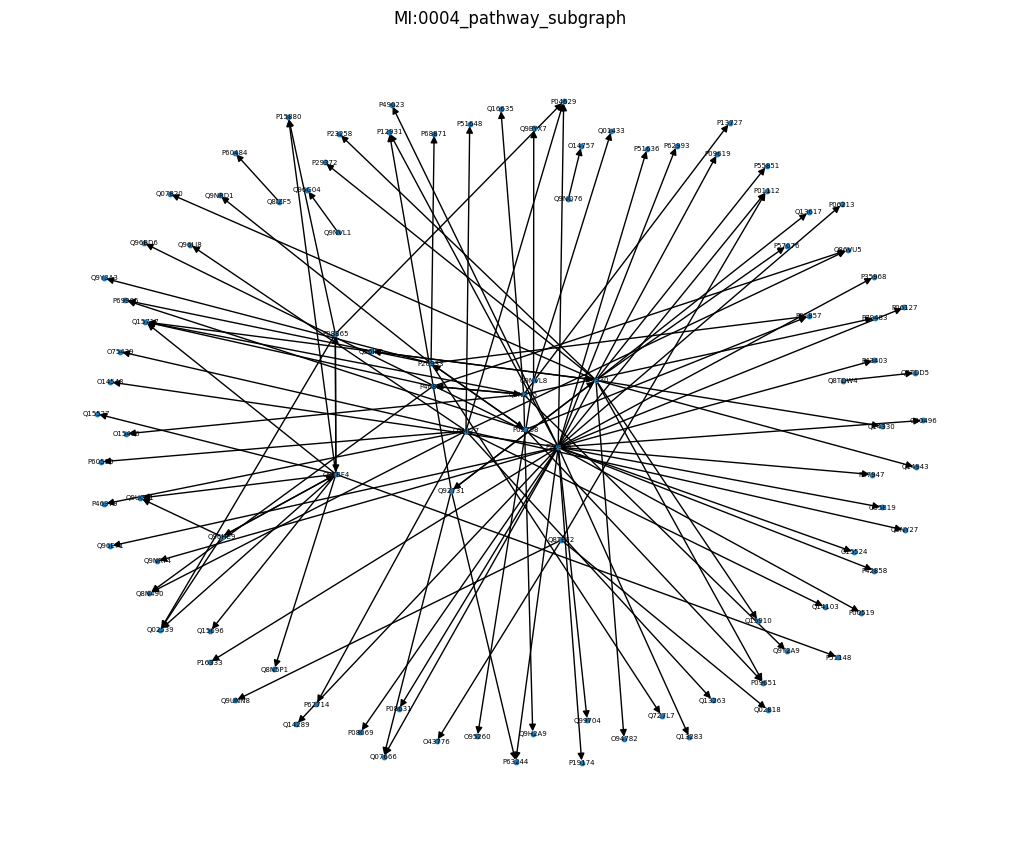

In [ ]:
#graph of 100 nodes from selected pathway
sample_nodes = list(one_pathway_graph.nodes)[:100]
subgraph = one_pathway_graph.subgraph(sample_nodes)
plt.figure(figsize=(10,8))
nx.draw(subgraph, with_labels=True, node_size=10, font_size=5)
plt.title("MI:0004_pathway_subgraph")
plt.show()

plt.close()

In [ ]:
seed_protein = "Q5MIZ7"
# Get first-degree neighbors (direct interactions)
pathway_nodes = set(graph1.successors(seed_protein)) | set(graph1.predecessors(seed_protein))
pathway_nodes.add(seed_protein)
# Extract the subgraph
seed_method_pathway = graph1.subgraph(pathway_nodes)

print(f"Pathway Graph - Nodes: {seed_method_pathway.number_of_nodes()}, Edges: {seed_method_pathway.number_of_edges()}")


Pathway Graph - Nodes: 34, Edges: 47


Pathway Graph - Nodes: 34, Edges: 47


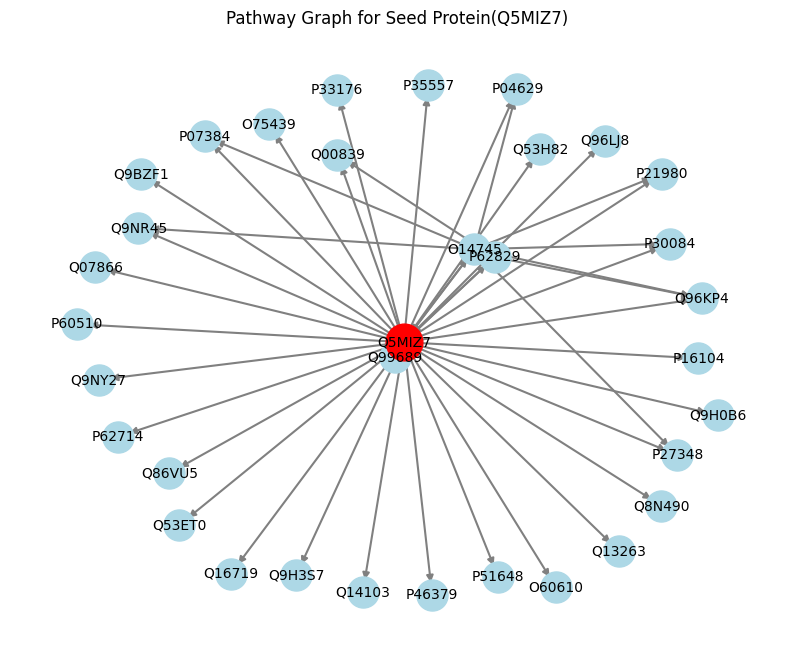

In [ ]:
seed_method_pathway = graph1.subgraph(pathway_nodes)
print(f"Pathway Graph - Nodes: {seed_method_pathway.number_of_nodes()}, Edges: {seed_method_pathway.number_of_edges()}")
plt.figure(figsize=(10, 8))  # Set the figure size
# Use a spring layout for better visualization
pos = nx.spring_layout(seed_method_pathway, seed=34)  # Seed for reproducibility
# Draw nodes and edges
nx.draw_networkx_nodes(seed_method_pathway, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_edges(seed_method_pathway, pos, edge_color="gray", width=1.5)
# Draw labels
nx.draw_networkx_labels(seed_method_pathway, pos, font_size=10, font_color="black")
# Highlight the seed protein
nx.draw_networkx_nodes(seed_method_pathway, pos, nodelist=[seed_protein], node_size=700, node_color="red")
# Add a title
plt.title(f"Pathway Graph for Seed Protein(Q5MIZ7)")
# Remove axes for a cleaner look
plt.axis("off")
plt.savefig(f"Pathway Graph for Seed Protein: {seed_protein}.png")
# Show the plot
plt.show()

In [ ]:
import networkx as nx

# Define two proteins
protein1 = "P26368"
protein2 = "P31943"

# Define the output file path
output_file = "shortest_paths.txt"

try:
    # Get all shortest paths using 'Confidence' as the weight
    paths = list(nx.all_shortest_paths(graph1, source=protein1, target=protein2, weight="Confidence"))
    print("Shortest paths:", paths)

    with open(output_file, "w") as f:
        f.write(f"All shortest paths between {protein1} and {protein2}:\n\n")

        # Iterate through the found paths
        for i, path in enumerate(paths):
            path_score = sum(graph1[u][v]['Confidence'] for u, v in zip(path[:-1], path[1:]))
            f.write(f"Path {i + 1}: {' -> '.join(path)}\n")
            f.write(f"Total path score: {path_score:.4f}\n")
            for u, v in zip(path[:-1], path[1:]):
                f.write(f"{u} -> {v}: {graph1[u][v]['Confidence']:.4f}\n")
        print(f"All shortest pathways printed to {output_file} ({len(paths)} paths found).")

except nx.NetworkXNoPath:
    print(f"No path found between {protein1} and {protein2}.")


No path found between P26368 and P31943.


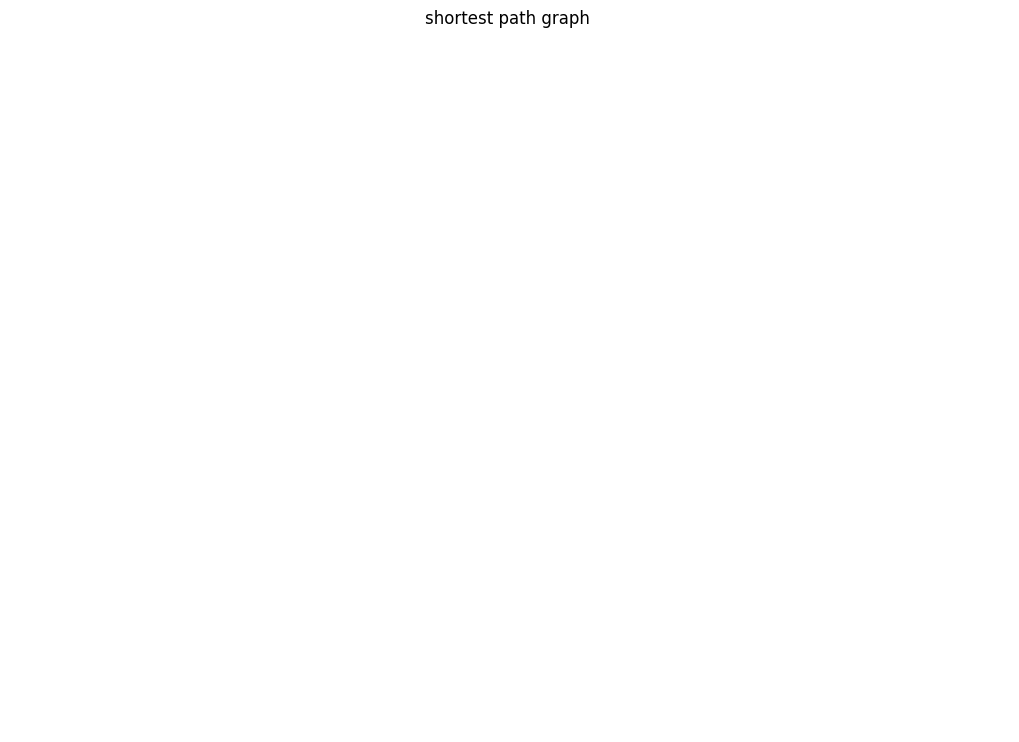

In [ ]:
#plot shortest path
short_path_node = set( node for path in paths for node in path )
short_path_graph = graph1.subgraph(short_path_node)
plt.figure(figsize=(10,7))
pos = nx.spring_layout(short_path_graph)
nx.draw(short_path_graph,pos,  with_labels=True, node_size=10, font_size=5, edge_color='r')
plt.title("shortest path graph ")
plt.show()

plt.close()

In [ ]:
#find protiens connected to protien1
protein1 = "P26368"
conected_protiens = list(graph1.neighbors(protein1))
degree_to_conected_protiens = graph1.degree(protein1)

# Changed the file path to the current working directory
with open("conected_protiens.txt", "w") as f:
    f.write(f"Protien: {protein1}\n")
    f.write(f"Degree : {degree_to_conected_protiens}\n\n")
    for p in conected_protiens:
         confidence = graph1[protein1][p]['Confidence']
         f.write(f"{p}\t{confidence}\n")